In [1]:
# Let's import some useful libraries 
import pandas as pd
import numpy as np
import datetime as dt
import math
from sklearn import neighbors
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import statistics as stat
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder

In [2]:
# import-read the file 'regression_data' into a pandas DataFrame and see its shape, it has 21597 rows and 21 columns
df = pd.read_excel('regression_data.xls')
df.shape

(21597, 21)

In [3]:
# We are gonna display the head of the dataframe
display(df.head())

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
# some general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
# let's see the columns in a list to understand the features
# df.columns or better
list(df.columns)

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [6]:
# Checking out the data types in a list
df.dtypes
# or #list(zip(df.columns,df.dtypes))

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [7]:
# Checking for the number unique features in each column
df.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [8]:
df.isna().sum()
# there are no NaN values in the columns

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [9]:
# looking for the quantity of each observation in every column-feature  
for col in df:
    print(df[col].value_counts(), '\n')

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64 

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: 

In [10]:
# describe the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


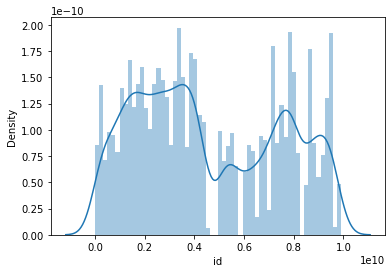

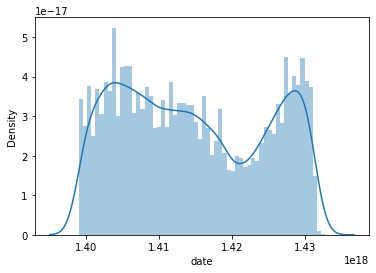

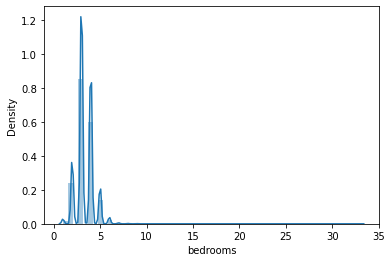

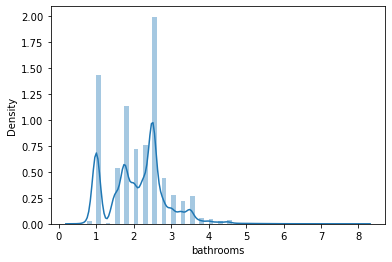

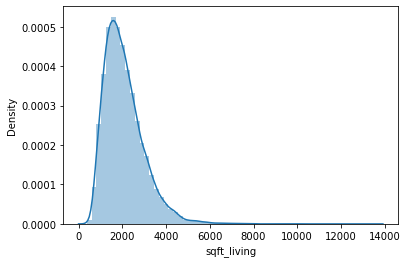

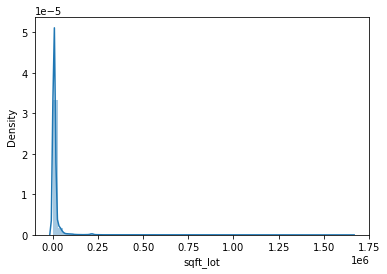

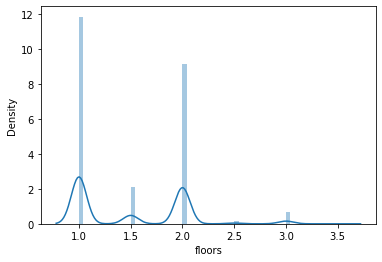

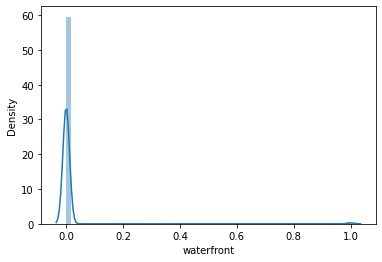

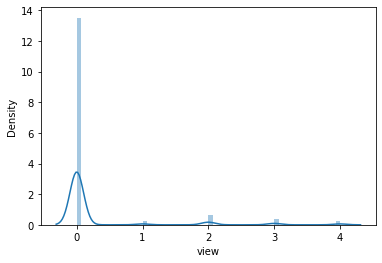

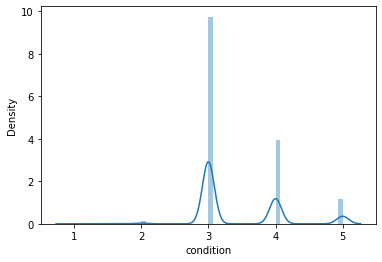

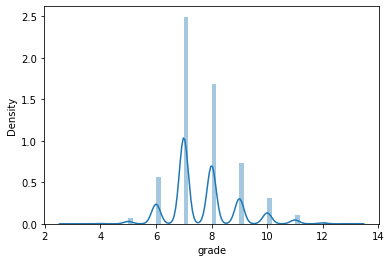

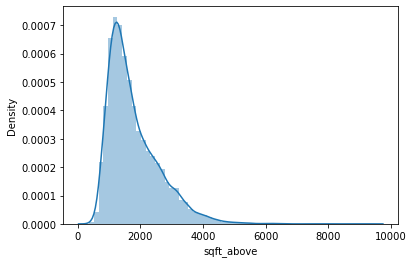

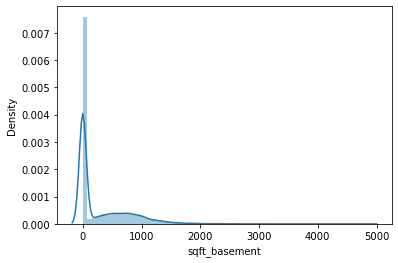

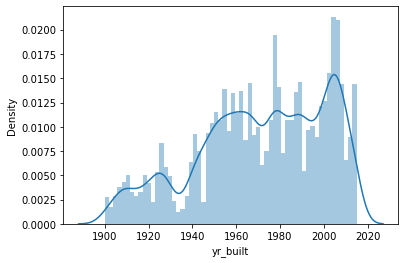

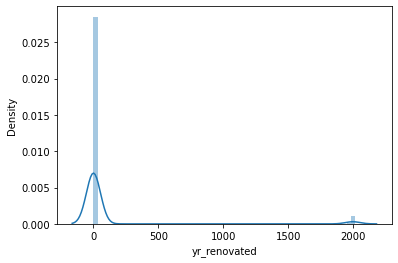

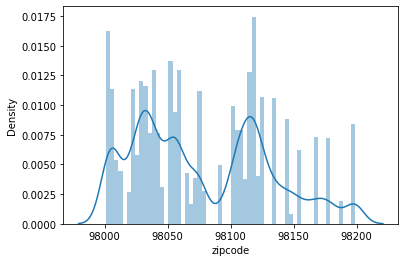

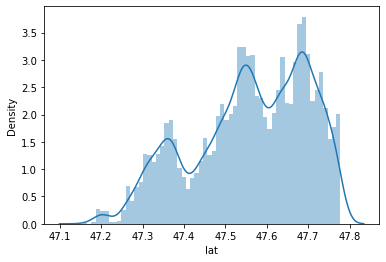

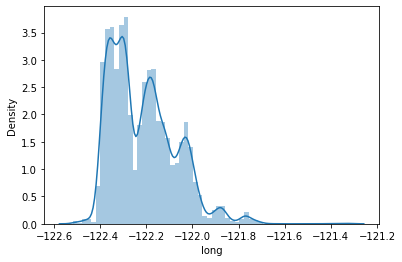

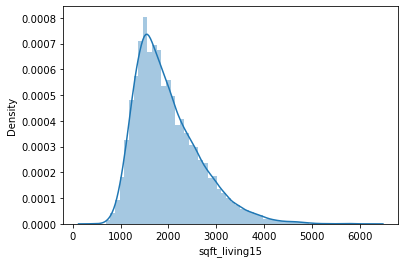

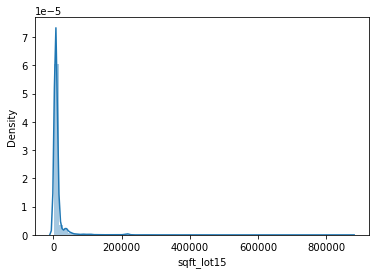

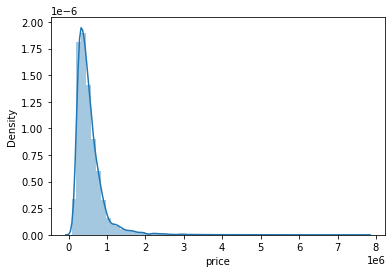

In [11]:
# distribution plots of the variables
for col in df:
    sns.distplot(df[col], bins=60)
    plt.show()
# some of the distributions are skewed, needed to normalize them

In [12]:
# we will convert the variable-column 'id' to an index
df=df.set_index('id') 
df.head(2)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000


In [13]:
df['date_year']=df['date'].dt.year

In [14]:
df.date_year.value_counts()

2014    14622
2015     6975
Name: date_year, dtype: int64

In [15]:
# We will drop the column 'date': the date the house was sold, as we have observations for only 2 years, it is a short period to
# get useful information with big differences in the prices.
df=df.drop(columns=['date','date_year'], axis=1)
df.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900


In [16]:
# We will also drop the columns 'lat' and 'long', we will not use the coordinates because we can get the same information
# (about the area) from column zipcode
df=df.drop(['lat','long'], axis=1)
df.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,
7129300520,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900


In [17]:
# the column's rows zipcode are just a sequence of numbers, so we decided to convert it to categorical 
df_cat = df[['zipcode']]
df_cat.head(2)

,zipcode
id,
7129300520,98178
6414100192,98125


In [18]:
# we can count the quantity of the selled houses in each zipcode 
df['zipcode'].value_counts()
# we can notice that we have a lot of sales in some specific zipcodes-areas

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [19]:
df_num =df.select_dtypes(include='number')
df_num=df_num.drop(columns='zipcode', axis=1)

In [20]:
# to hide the repeat half of the matrix in order to hide the half heatmap
mask = np.zeros_like(df_num.corr())
mask
mask[np.triu_indices_from(mask)] = True 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

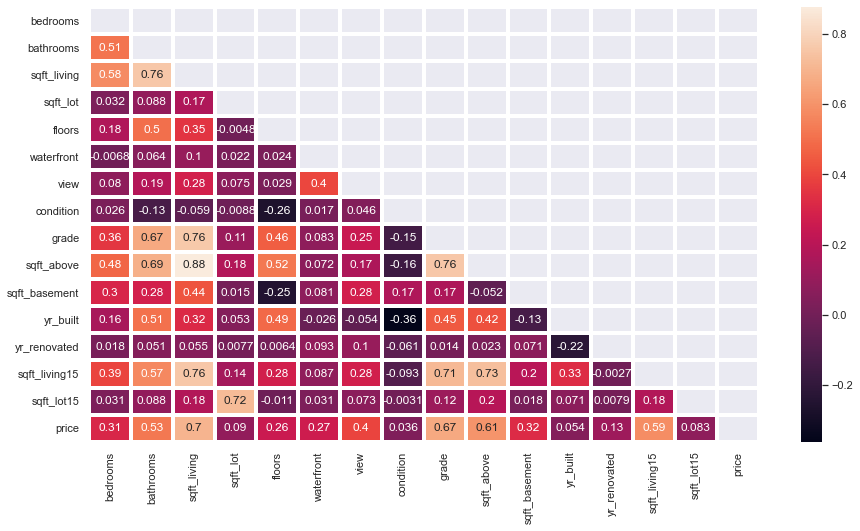

In [21]:
# the correlations matrix from numerical columns
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

In [22]:
df_num.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
Name: price, dtype: float64

In [23]:
# let's filter by checking the features that have correlation > 0,55 or < -0,55 with the target 'price'
correlations_matrix = df_num.corr()
correlations_matrix[(correlations_matrix['price'] > .55) | (correlations_matrix['price'] < -.55)]['price']

sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
price            1.000000
Name: price, dtype: float64

In [24]:
# Let's also check the features that have low correlation with the target 'price'
correlations_matrix[(correlations_matrix['price'] < .1) | (correlations_matrix['price'] < -.1)]['price']

sqft_lot      0.089876
condition     0.036056
yr_built      0.053953
sqft_lot15    0.082845
Name: price, dtype: float64

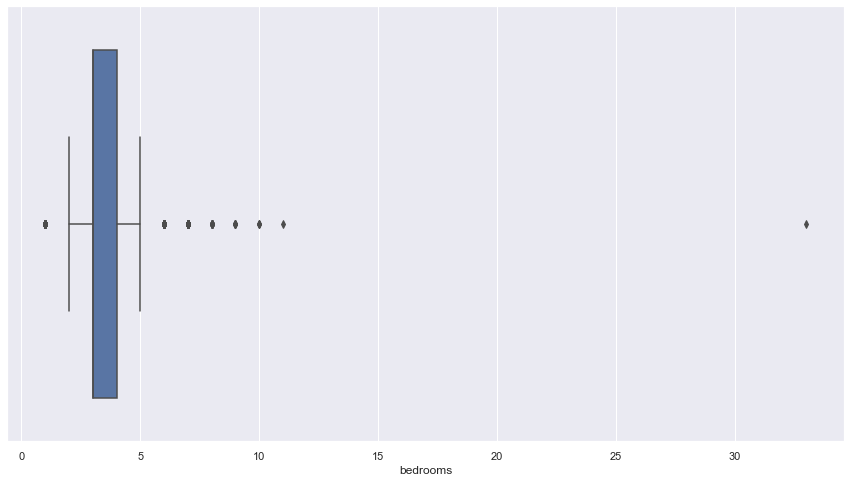

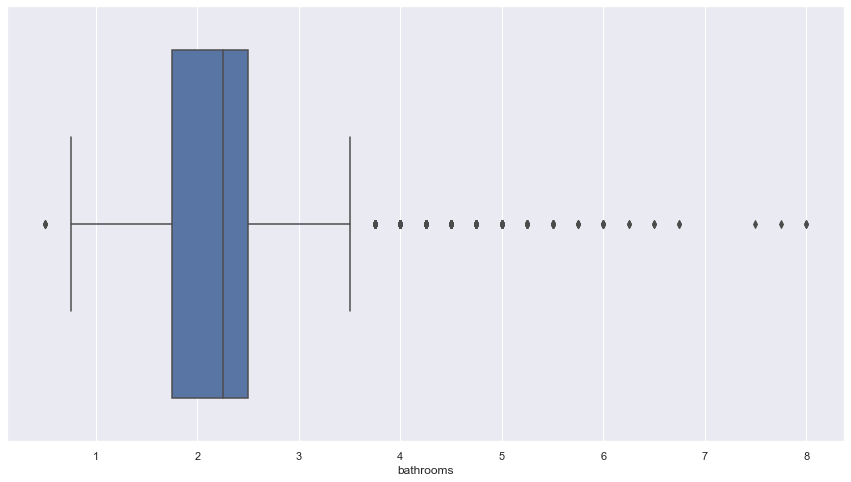

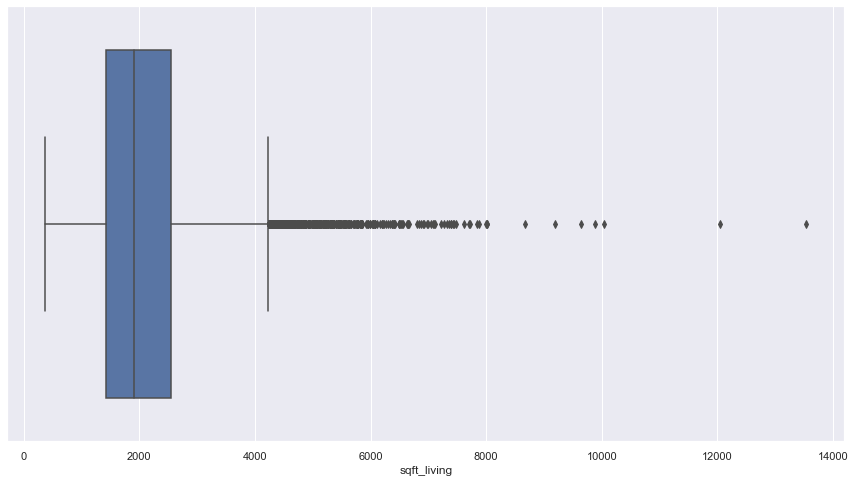

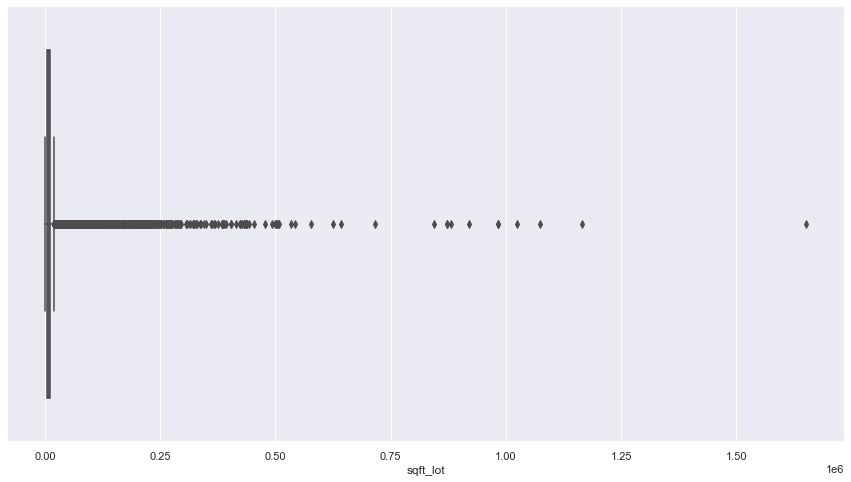

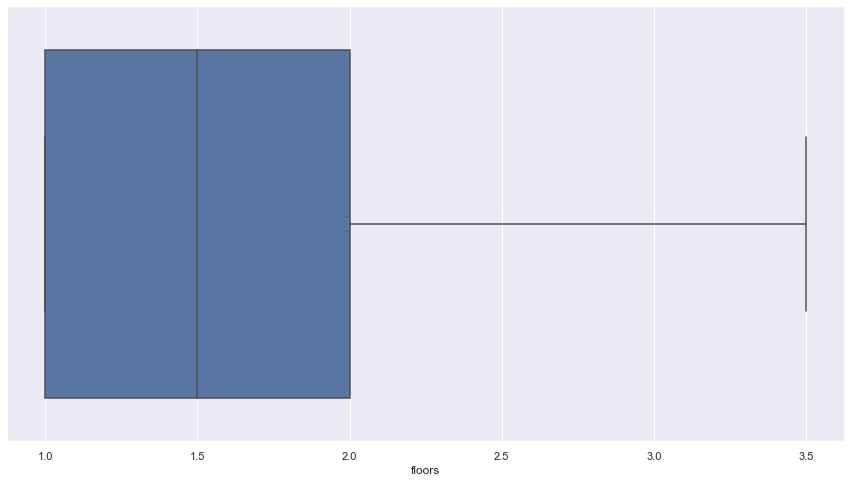

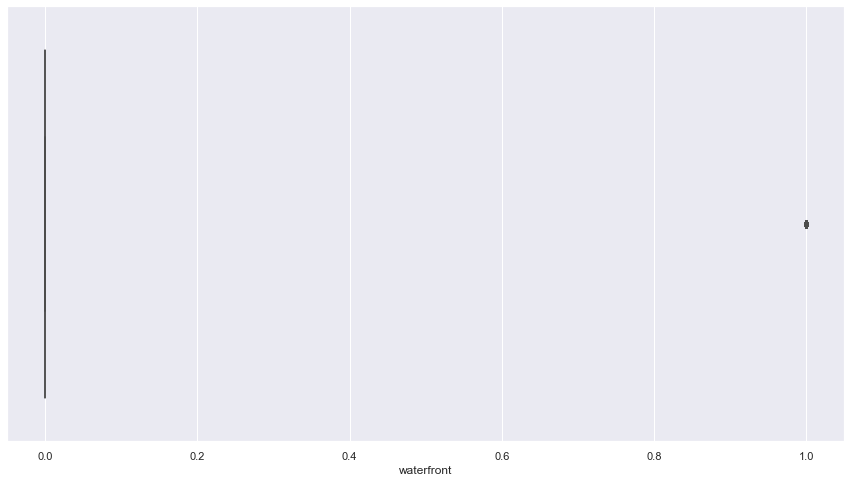

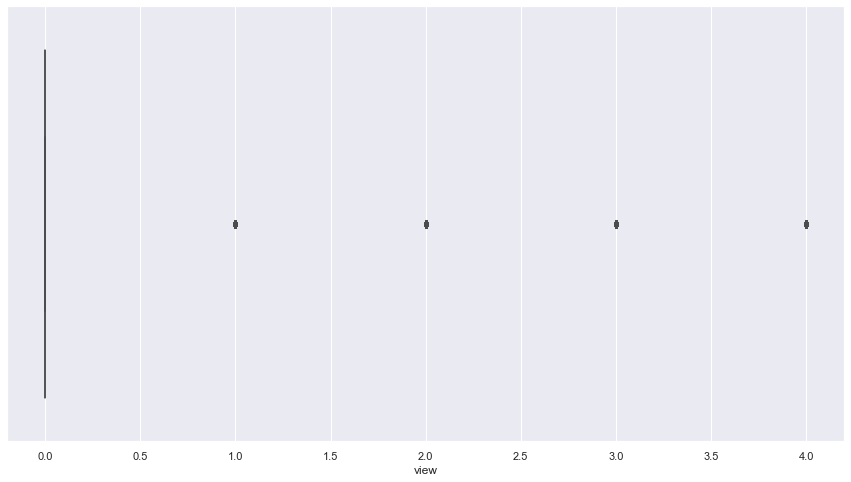

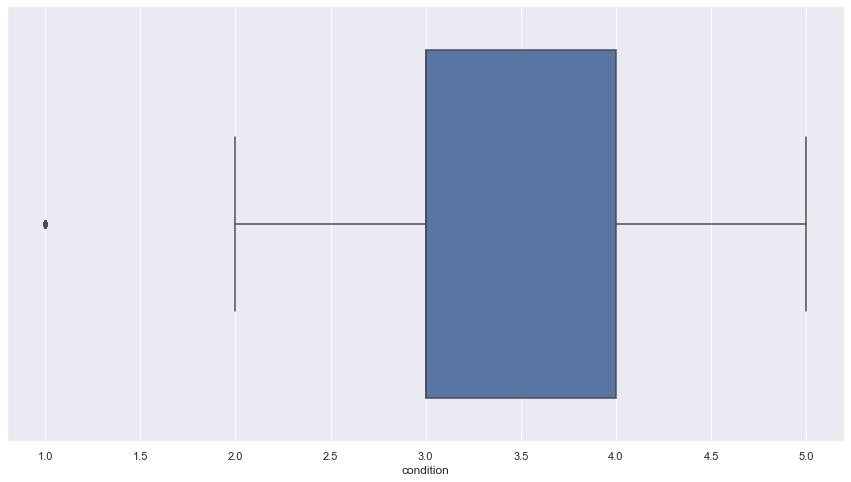

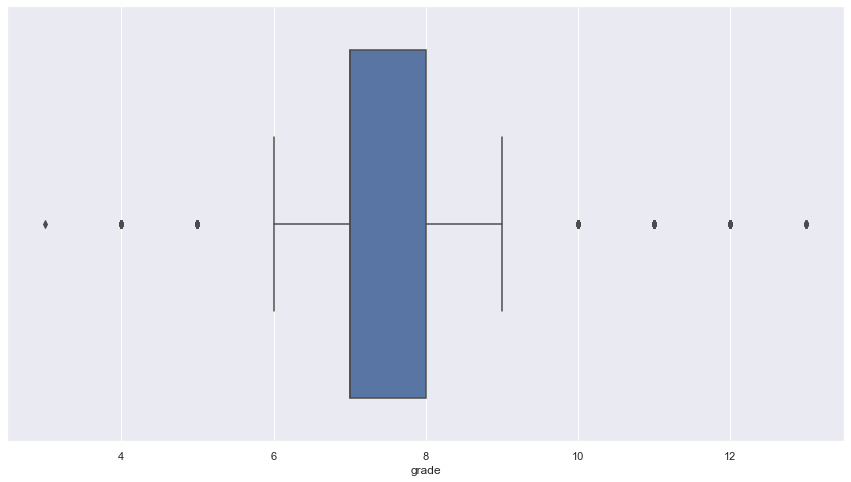

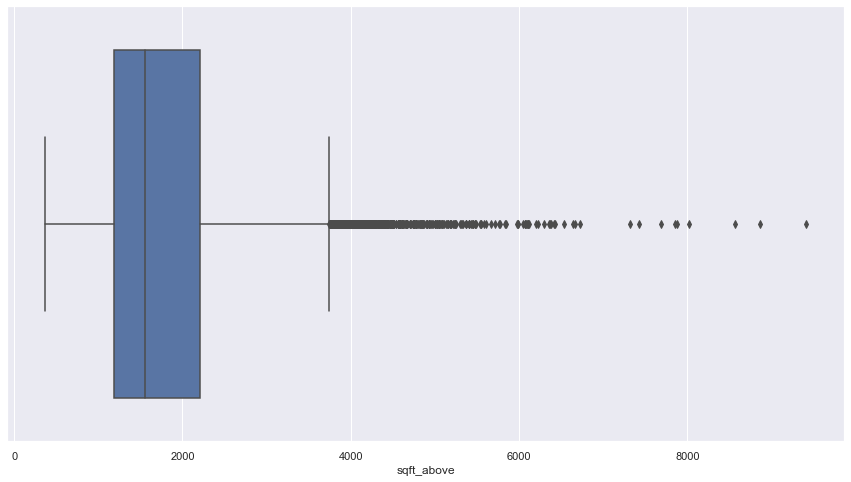

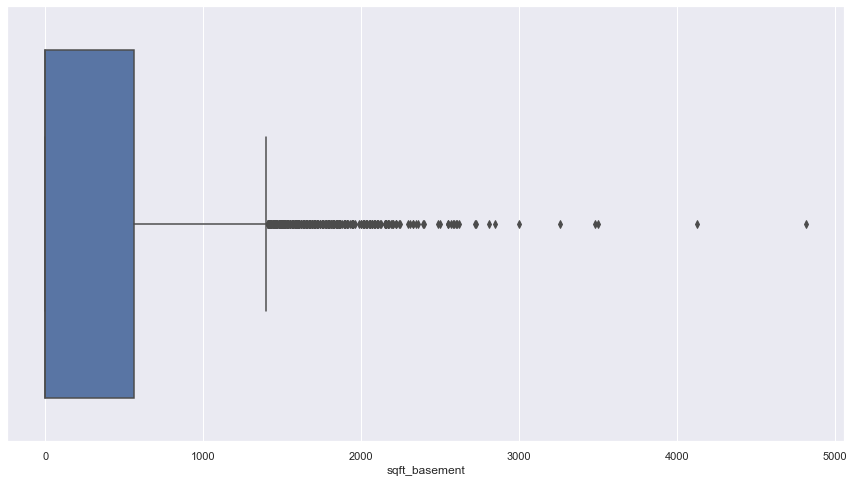

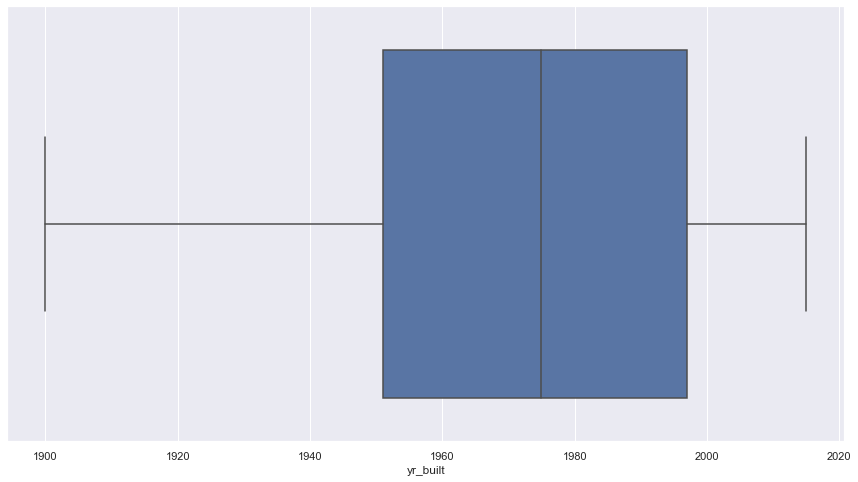

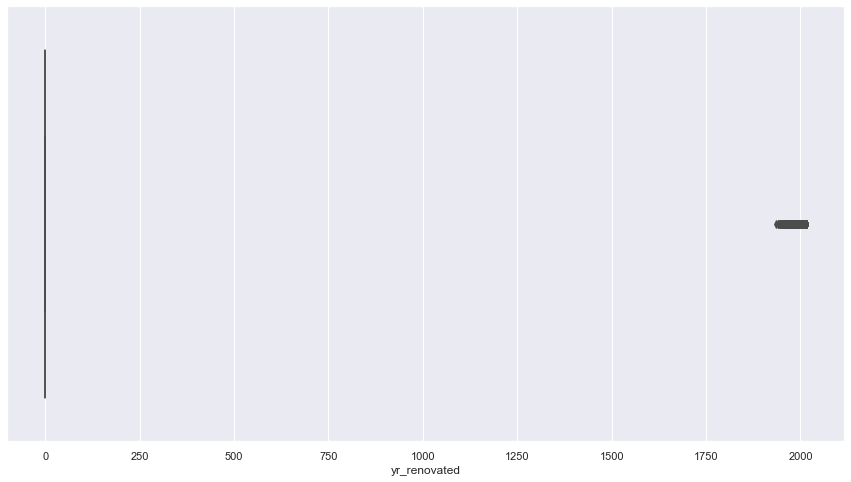

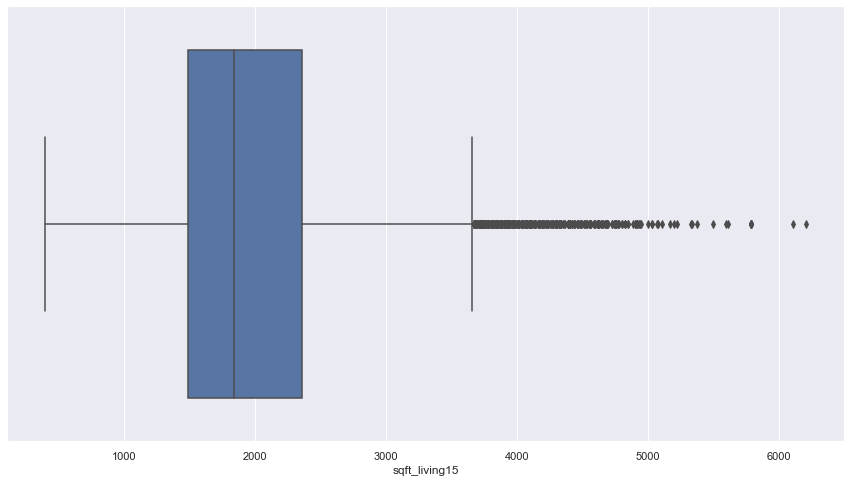

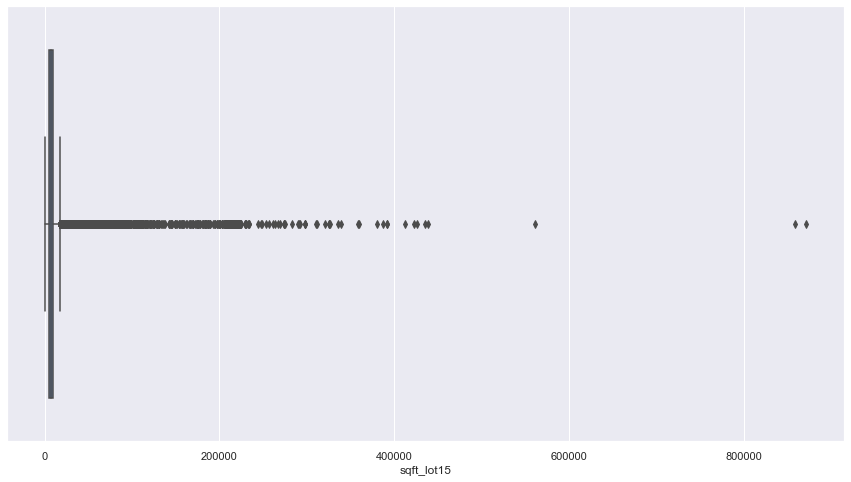

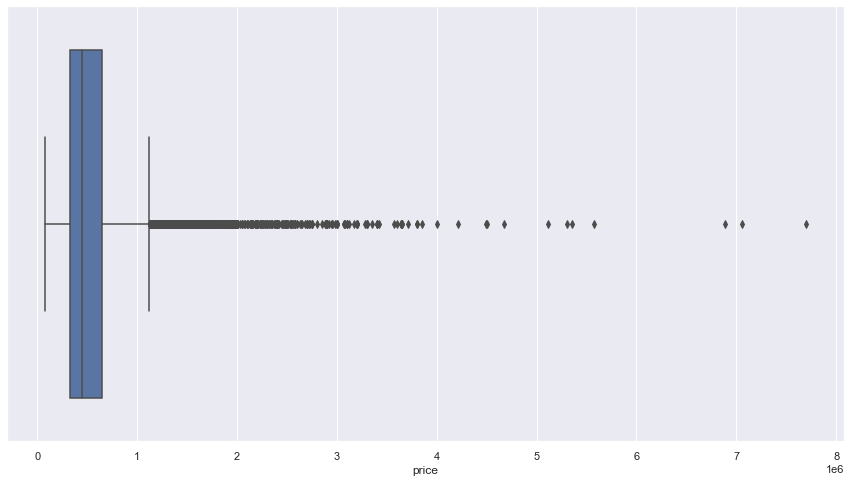

In [25]:
# Let's check in detail the outliers in the numerical variables with boxplots, so
for col in df_num:
    sns.boxplot(df_num[col])
    plt.show()

### Checking outliers in the target variable

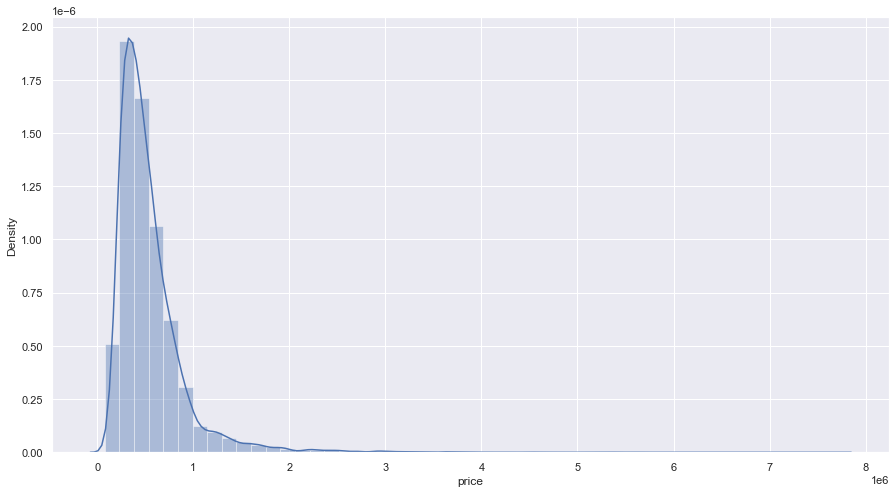

In [26]:
# distribution plot of the target variable
sns.distplot(df['price']);
# it is skewed

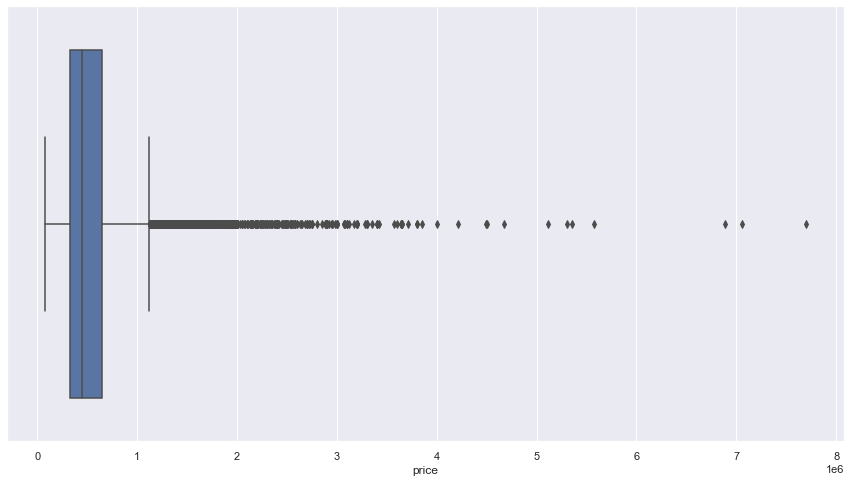

In [27]:
# boxplot of the target variable
sns.boxplot(df['price'])
plt.show()
# we have a lot of outliers at high prices

In [28]:
# X-y split
y = df['price']
X = df.drop('price', axis=1)

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train_num = X_train.select_dtypes(include='number')
X_train_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
9834201100,4,2.00,1440,4855,2.0,0,0,4,7,1440,0,1972,0,98144,1300,4080
7795810110,3,1.75,1430,9857,1.0,0,2,4,7,1140,290,1980,0,98045,1310,9880


In [31]:
X_train_num = X_train_num.drop('zipcode', axis=1)
X_train_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
9834201100,4,2.00,1440,4855,2.0,0,0,4,7,1440,0,1972,0,1300,4080
7795810110,3,1.75,1430,9857,1.0,0,2,4,7,1140,290,1980,0,1310,9880


In [32]:
X_train_cat = X_train[['zipcode']]
X_train_cat.head(2)

,zipcode
id,
9834201100,98144
7795810110,98045


In [33]:
X_test_cat = X_test[['zipcode']]
X_test_cat.head(2)

,zipcode
id,
6303401050,98146
1995200200,98115


##### Both the train set and the test set will be fitted with the same *encoder*

In [34]:
# Let's use One Hot/Label Encoding for the categorical feature
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_train = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
onehot_encoded_train = pd.DataFrame(encoded_train, columns=cols)
onehot_encoded_train.head(2)

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Min-max scaler
# For each column, each value in the column is subtracted by the max of the column 
# and then divided by the difference of max and min of the column. Data range from 0 - 1, instead of min to max
# It is very sensitive to the presence of outliers.

MinMaxtransformer = MinMaxScaler().fit(X_train_num)
x_train_norm = MinMaxtransformer.transform(X_train_num)
print(x_train_norm.shape)
x_train_norm = pd.DataFrame(x_train_norm,columns=X_train_num.columns)
x_train_norm.head(2)

(17277, 15)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.3,0.200000,0.081245,0.002626,0.4,0.0,0.0,0.75,0.4,0.118363,0.000000,0.626087,0.0,0.155051,0.003939
1,0.2,0.166667,0.080486,0.005656,0.0,0.0,0.5,0.75,0.4,0.085177,0.060166,0.695652,0.0,0.156772,0.010601


In [36]:
# concatenating DataFrames
X_train_concat = pd.concat([x_train_norm, onehot_encoded_train], axis=1)
X_train_concat.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.3,0.200000,0.081245,0.002626,0.4,0.0,0.0,0.75,0.4,0.118363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.166667,0.080486,0.005656,0.0,0.0,0.5,0.75,0.4,0.085177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3,0.300000,0.208808,0.002714,0.4,0.0,0.0,0.50,0.6,0.304204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.266667,0.128322,0.003900,0.0,0.0,0.0,0.50,0.4,0.094027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.161731,0.002156,0.2,0.0,0.0,1.00,0.4,0.144912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Apply linear regression. Fit the model in Supervised learning. 
# Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model_train = LinearRegression()
model_train.fit(X_train_concat, y_train)

LinearRegression()

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17277, 16)
(4320, 16)
(17277,)
(4320,)


In [39]:
X_test_num = X_test.select_dtypes(include='number')
X_test_num

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
6303401050,3,0.75,850,8573,1.0,0,0,3,6,600,250,1945,0,98146,850,8382
1995200200,3,1.00,1510,6083,1.0,0,0,4,6,860,650,1940,0,98115,1510,5712
1423089118,4,2.25,1790,42000,1.0,0,0,3,7,1170,620,1983,0,98045,2060,50094
9349900110,2,1.50,1140,2500,1.0,0,1,3,7,630,510,1988,0,98106,1500,5000
455000395,3,1.00,1500,3920,1.0,0,0,3,7,1000,500,1947,0,98107,1640,4017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835000055,2,1.00,1020,5130,1.0,0,0,4,6,1020,0,1948,0,98002,1200,6497
2612000200,3,2.50,2050,8172,2.0,0,0,3,8,2050,0,2002,0,98168,2140,5664
2623029078,5,2.00,2120,137565,1.5,0,0,3,7,2120,0,1913,0,98070,2120,157123


In [40]:
X_test_num = X_test_num.drop('zipcode', axis=1)
X_test_num

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
6303401050,3,0.75,850,8573,1.0,0,0,3,6,600,250,1945,0,850,8382
1995200200,3,1.00,1510,6083,1.0,0,0,4,6,860,650,1940,0,1510,5712
1423089118,4,2.25,1790,42000,1.0,0,0,3,7,1170,620,1983,0,2060,50094
9349900110,2,1.50,1140,2500,1.0,0,1,3,7,630,510,1988,0,1500,5000
455000395,3,1.00,1500,3920,1.0,0,0,3,7,1000,500,1947,0,1640,4017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835000055,2,1.00,1020,5130,1.0,0,0,4,6,1020,0,1948,0,1200,6497
2612000200,3,2.50,2050,8172,2.0,0,0,3,8,2050,0,2002,0,2140,5664
2623029078,5,2.00,2120,137565,1.5,0,0,3,7,2120,0,1913,0,2120,157123


In [41]:
# Let's use One Hot/Label Encoding for the categorical feature
# encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_test = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names(input_features=X_test_cat.columns)
onehot_encoded_test = pd.DataFrame(encoded_test, columns=cols)
onehot_encoded_test.head(2)

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Min-max scaler
# For each column, each value in the column is subtracted by the max of the column 
# and then divided by the difference of max and min of the column. Data range from 0 - 1, instead of min to max
# It is very sensitive to the presence of outliers.
# without fit for test
x_test_norm = MinMaxtransformer.transform(X_test_num) # check "transform"
print(x_test_norm.shape)
x_test_norm = pd.DataFrame(x_test_norm,columns=X_test_num.columns)
x_test_norm.head()

(4320, 15)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.2,0.033333,0.036446,0.004878,0.0,0.0,0.00,0.50,0.3,0.025442,0.051867,0.391304,0.0,0.077611,0.008881
1,0.2,0.066667,0.086560,0.003370,0.0,0.0,0.00,0.75,0.3,0.054204,0.134855,0.347826,0.0,0.191189,0.005814
2,0.3,0.233333,0.107821,0.025127,0.0,0.0,0.00,0.50,0.4,0.088496,0.128631,0.721739,0.0,0.285837,0.056795
3,0.1,0.133333,0.058466,0.001199,0.0,0.0,0.25,0.50,0.4,0.028761,0.105809,0.765217,0.0,0.189468,0.004996
4,0.2,0.066667,0.085801,0.002060,0.0,0.0,0.00,0.50,0.4,0.069690,0.103734,0.408696,0.0,0.213560,0.003867


In [43]:
# concatenating DataFrames
X_test_concat = pd.concat([x_test_norm, onehot_encoded_test], axis=1)
X_test_concat

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.2,0.033333,0.036446,0.004878,0.0,0.0,0.00,0.50,0.3,0.025442,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.066667,0.086560,0.003370,0.0,0.0,0.00,0.75,0.3,0.054204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3,0.233333,0.107821,0.025127,0.0,0.0,0.00,0.50,0.4,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.1,0.133333,0.058466,0.001199,0.0,0.0,0.25,0.50,0.4,0.028761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.066667,0.085801,0.002060,0.0,0.0,0.00,0.50,0.4,0.069690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.1,0.066667,0.049355,0.002793,0.0,0.0,0.00,0.75,0.3,0.071903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4316,0.2,0.266667,0.127563,0.004635,0.4,0.0,0.00,0.50,0.5,0.185841,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4317,0.4,0.200000,0.132878,0.083015,0.2,0.0,0.00,0.50,0.4,0.193584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4318,0.2,0.266667,0.123007,0.004275,0.4,0.0,0.00,0.50,0.4,0.179204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Let's find the R2 score (Coefficient of determination) 
# The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

predictions = model_train.predict(X_test_concat)
r2_score(y_test, predictions) # or model.score(X1_test, y_test) An unbiased estimation of the predictive performance of your model is based on test data

0.794383880459157

In [45]:
# MSE (Mean Squared Error) represents the difference between the original and predicted values extracted
# by squared the average difference over the data set.
mean_squared_error(y_test, predictions, squared=False)

163629.3562230247

In [46]:
# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
import math
math.sqrt(mean_squared_error(y_test, predictions, squared=False))

404.5112559905159

In [47]:
# MAE (Mean absolute error) represents the difference between the original and predicted values extracted 
#by averaged the absolute difference over the data set.
mean_absolute_error(y_test, predictions)

97221.71451695258

In [48]:
# all of them
print('r2 score is: ', r2_score(y_test, predictions),', RMSE is: ', math.sqrt(mean_squared_error(y_test, predictions, squared=False)), ', MAE is: ', mean_absolute_error(y_test, predictions),'and MSE is: ', mean_squared_error(y_test, predictions, squared=False))

r2 score is:  0.794383880459157 , RMSE is:  404.5112559905159 , MAE is:  97221.71451695258 and MSE is:  163629.3562230247


In [49]:
# bias 𝑏₀
print('intercept:', model_train.intercept_)

intercept: -257144.99056549172


In [50]:
# array containing 𝑏₁, 𝑏₂, ... respectively
print('slope:', model_train.coef_)

slope: [-2.83155490e+05  1.74117568e+05  2.30209754e+17  3.51172545e+05
 -1.15265058e+05  6.49621632e+05  2.24735793e+05  1.06224389e+05
  5.82044400e+05 -1.58017933e+17 -8.42529245e+16 -7.81440000e+04
  3.59520000e+04  7.50320000e+04 -1.54228000e+05  3.10445000e+04
 -6.73275000e+03  7.50888000e+05  3.06182000e+05  2.63241500e+05
  2.47062000e+05  2.51374000e+05  7.00262500e+04  1.22414094e+05
  1.04483000e+05  9.37230000e+04 -4.73900000e+03 -2.82660000e+04
  1.65425000e+05  1.69786000e+05  1.20014000e+05  2.16418000e+05
  7.88150000e+03  1.80575000e+04  8.27900000e+03  3.63478000e+05
  2.05703000e+05  3.39840000e+04  1.36303700e+06  5.19588000e+05
  1.01612500e+04  9.49760000e+04  2.29065750e+05  1.95712000e+05
  4.88430000e+04  1.00463000e+05  3.18530000e+04  8.28180000e+04
  8.26360000e+04 -7.37100000e+03  1.49960000e+05  1.78202000e+05
  1.66944000e+05  1.18837000e+05 -2.89887500e+04  5.18998750e+05
  3.45513000e+05  4.81976000e+05  1.56798000e+05  3.51272000e+05
  1.34459750e+05  

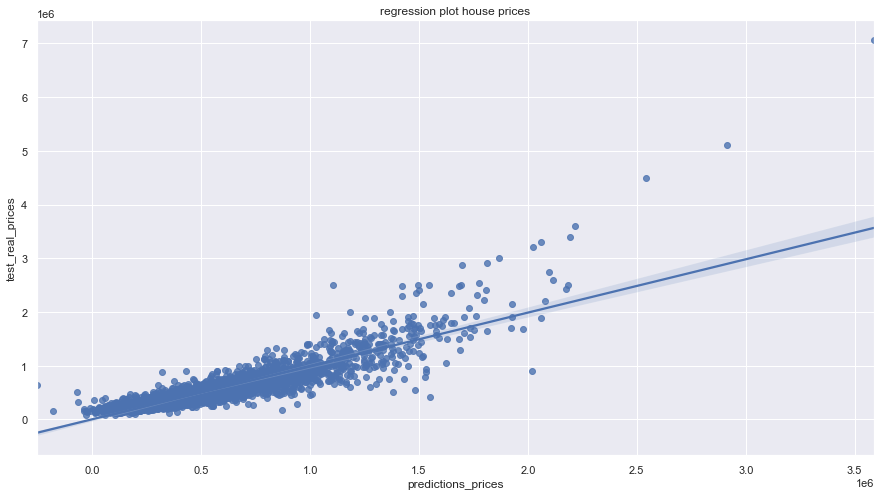

In [51]:
sns.regplot(x=predictions, y=y_test)
plt.xlabel('predictions_prices')
plt.ylabel('test_real_prices')
plt.title('regression plot house prices');

### Now we are going to use the StandardScaler

In [52]:
# using the StandardScaler
# For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.
# Works row wise, so it takes information from the whole column. It is wise to do the train/test split beforehand.
Standard_scaler = StandardScaler().fit(X_train_num) 
x_train_num_st = Standard_scaler.transform(X_train_num)
x_train_num_st = pd.DataFrame(x_train_num_st,columns=X_train_num.columns)
x_train_num_st.head(3)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.691203,-0.149233,-0.701342,-0.252125,0.933592,-0.087744,-0.303509,0.905470,-0.562768,-0.424152,-0.660789,0.035248,-0.209281,-1.005735,-0.322386
1,-0.414530,-0.474899,-0.712241,-0.127687,-0.915081,-0.087744,2.304657,0.905470,-0.562768,-0.787361,-0.007125,0.307771,-0.209281,-0.991102,-0.107778
2,0.691203,0.827764,1.129672,-0.248518,0.933592,-0.087744,-0.303509,-0.631098,1.148415,1.609819,-0.660789,1.329731,-0.209281,1.774496,-0.288344


In [53]:
# no fitting for the test set
x_test_num_st = Standard_scaler.transform(X_test_num)
x_test_num_st = pd.DataFrame(x_test_num_st,columns=X_test_num.columns) 
x_test_num_st.head(3)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.414530,-1.777562,-1.344376,-0.159630,-0.915081,-0.087744,-0.303509,-0.631098,-1.418359,-1.441138,-0.097286,-0.884516,-0.209281,-1.664211,-0.163206
1,-0.414530,-1.451896,-0.625050,-0.221575,-0.915081,-0.087744,-0.303509,0.905470,-1.418359,-1.126357,0.804320,-1.054842,-0.209281,-0.698446,-0.261999
2,0.691203,0.176433,-0.319881,0.671952,-0.915081,-0.087744,-0.303509,-0.631098,-0.562768,-0.751041,0.736700,0.409967,-0.209281,0.106357,1.380191


In [54]:
encoded_test = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_test_cat.columns)
onehot_encoded_test = pd.DataFrame(encoded_test, columns=cols)
onehot_encoded_test.head(2)

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


encoded_train_st = encoder.transform(X_train_cat).toarray()
encoded_test_st = encoder.transform(X_test_cat).toarray()

In [55]:
# encoding
encoder_train_st = OneHotEncoder(handle_unknown='error', drop='first')
encoder_train_st.fit(X_train_cat)

encoder_test_st = OneHotEncoder(handle_unknown='error', drop='first')
encoder_test_st.fit(X_test_cat)

OneHotEncoder(drop='first')

In [56]:
encoded_train_st = encoder_train_st.transform(X_train_cat).toarray()
encoded_test_st = encoder_test_st.transform(X_test_cat).toarray()

In [57]:
# concatenating train sets
X_concat_train_st = np.concatenate([x_train_num_st, encoded_train_st], axis=1) # it is an array
X_concat_train_st

array([[ 0.69120327, -0.14923285, -0.70134184, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41452996, -0.47489864, -0.71224073, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69120327,  0.8277645 ,  1.12967201, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.69120327, -0.80056442, -0.60325181, ...,  0.        ,
         0.        ,  0.        ],
       [-2.62599643, -1.77756177, -1.85662439, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69120327,  0.50209871,  0.73186246, ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
# concatenating test sets
X_concat_test_st = np.concatenate([x_test_num_st, encoded_test_st], axis=1)
X_concat_test_st

array([[-0.41452996, -1.77756177, -1.34437646, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41452996, -1.45189599, -0.62504959, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69120327,  0.17643293, -0.31988062, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.7969365 , -0.14923285,  0.03978282, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41452996,  0.50209871, -0.10190278, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69120327, -0.14923285, -0.53785846, ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
# using linear regression 
model1 = LinearRegression() 
model1.fit(X_concat_train_st,y_train)

LinearRegression()

In [60]:
predictions1  = model1.predict(X_concat_test_st)
predictions1

array([ 92320.97362858, 460512.97362858, 291488.97362858, ...,
       296704.97362858, 237792.97362858, 247728.97362858])

In [61]:
r2=r2_score(y_test, predictions1)
rmse=mean_squared_error(y_test, predictions1, squared=False)
mse=mean_squared_error(y_test, predictions1)
mae=mean_absolute_error(y_test, predictions1)

In [62]:
# getting the metrics
r2, rmse, mse, mae

(0.7943834856538577, 163629.51331602424, 26774617628.038956, 97223.27341759921)

In [63]:
# The obtained results, both with MinMaxScaler and with StandardScaler are very similar.

#### Now we are going to use the K-Neares Neighbors

In [64]:
r2_val=[]
rmse_val = [] 
mse_val = []
mae_val = []

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_concat_train_st, y_train)  #fit the model
    pred=model.predict(X_concat_test_st) #make prediction on test set
   # error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
     #store rmse values
    
    r2_k=r2_score(y_test, pred)
    rmse_k=mean_squared_error(y_test, pred, squared=False)
    mse_k=mean_squared_error(y_test, pred)
    mae_k=mean_absolute_error(y_test, pred)
    
    r2_val.append(r2_k)
    rmse_val.append(rmse_k)
    mse_val.append(mse_k)
    mae_val.append(mae_k)
    print('r2 value for k= ' , K , 'is:', r2_k)
    print('RMSE value for k= ' , K , 'is:', rmse_k)
    print('MSE value for k= ' , K , 'is:', mse_k)
    print('MAE value for k= ' , K , 'is:', mae_k)
    print('\n')

r2 value for k=  1 is: 0.6612713157169395
RMSE value for k=  1 is: 210019.02112677242
MSE value for k=  1 is: 44107989235.04768
MAE value for k=  1 is: 111425.40601851852


r2 value for k=  2 is: 0.7353395527352828
RMSE value for k=  2 is: 185642.3953087255
MSE value for k=  2 is: 34463098935.96111
MAE value for k=  2 is: 100161.04398148147


r2 value for k=  3 is: 0.7567616708475113
RMSE value for k=  3 is: 177970.75715756437
MSE value for k=  3 is: 31673590403.23675
MAE value for k=  3 is: 96084.02677469136


r2 value for k=  4 is: 0.7560946434152302
RMSE value for k=  4 is: 178214.6128525997
MSE value for k=  4 is: 31760448234.201996
MAE value for k=  4 is: 95615.52962962963


r2 value for k=  5 is: 0.75939298372553
RMSE value for k=  5 is: 177005.51016408126
MSE value for k=  5 is: 31330950628.446674
MAE value for k=  5 is: 95797.09375


r2 value for k=  6 is: 0.7551539898976928
RMSE value for k=  6 is: 178557.93635717037
MSE value for k=  6 is: 31882936636.13131
MAE value for k=  

### The best value of K seem to be 3. However, the r2 value is lower than in Linear Regression.

In [65]:
# for k=3 the r2 value is bigger than the rest of ks', however the r2 score for k=3 is 0.7567616708475113,
# less than the r2 score with scaling in linear regression

In [66]:
model_k3 = neighbors.KNeighborsRegressor(n_neighbors = 3)
model_k3.fit(X_concat_train_st, y_train)  
pred_k3=model_k3.predict(X_concat_test_st)

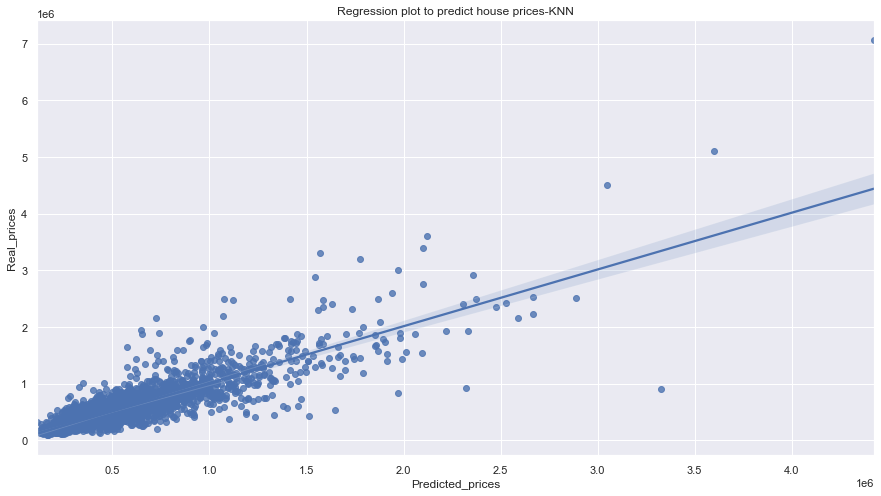

In [67]:
sns.regplot(x=pred_k3, y=y_test)
plt.xlabel('Predicted_prices')
plt.ylabel('Real_prices')
plt.title('Regression plot to predict house prices-KNN');

#### Next we are going to checking outliers

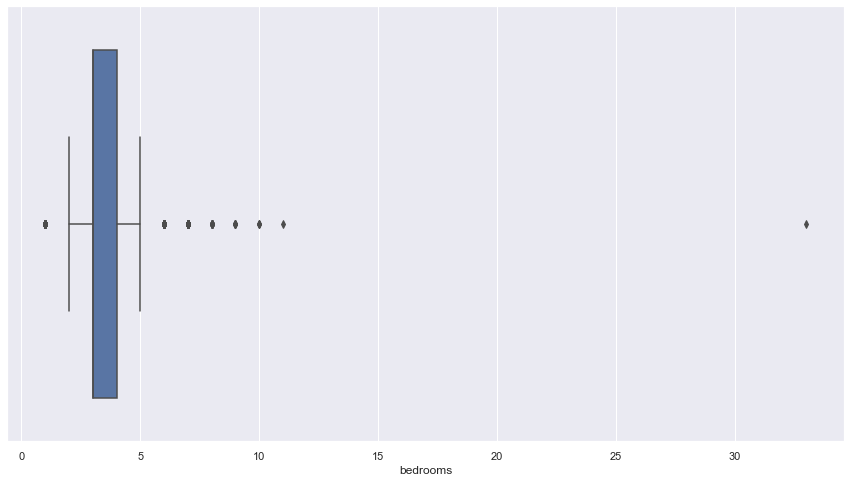

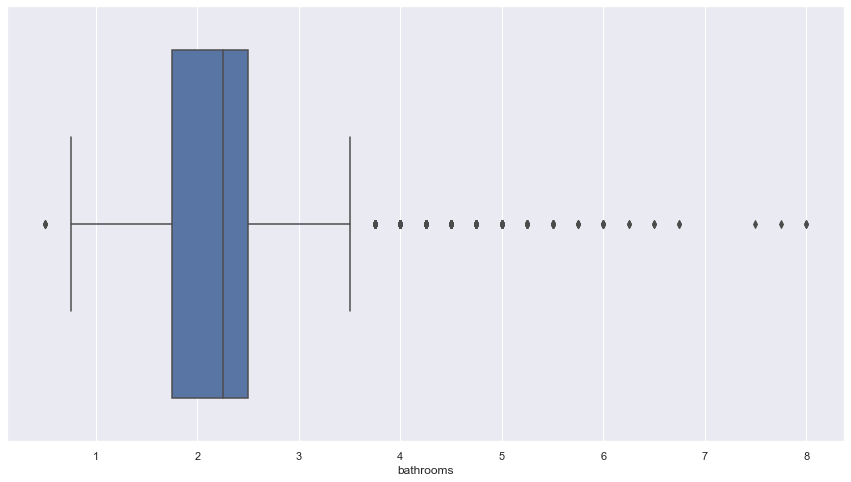

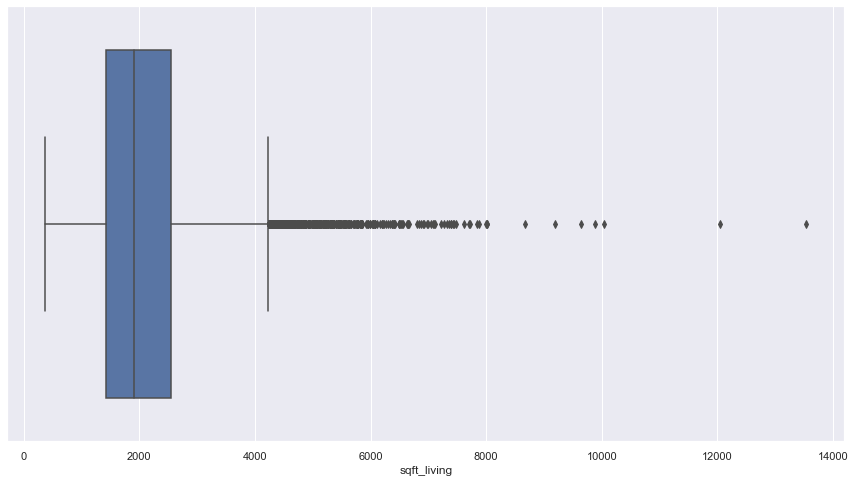

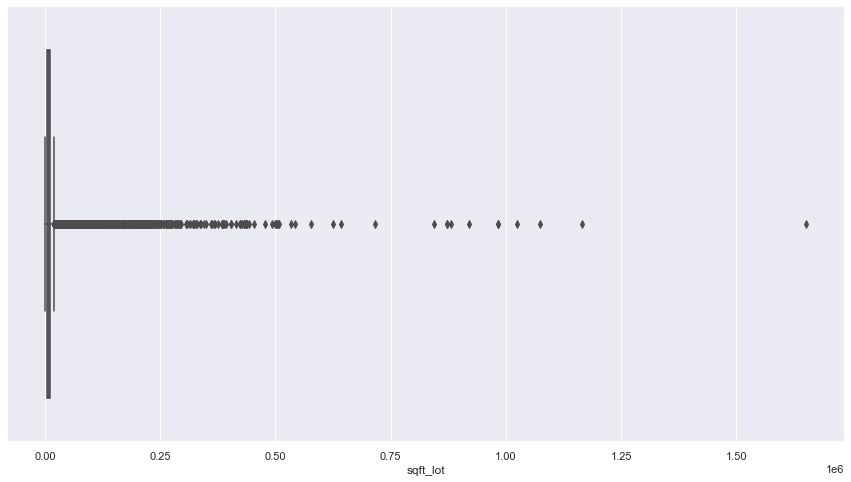

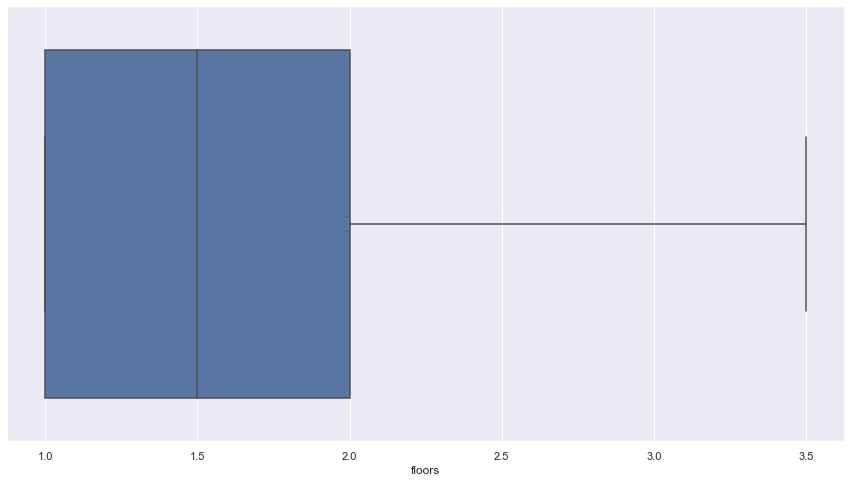

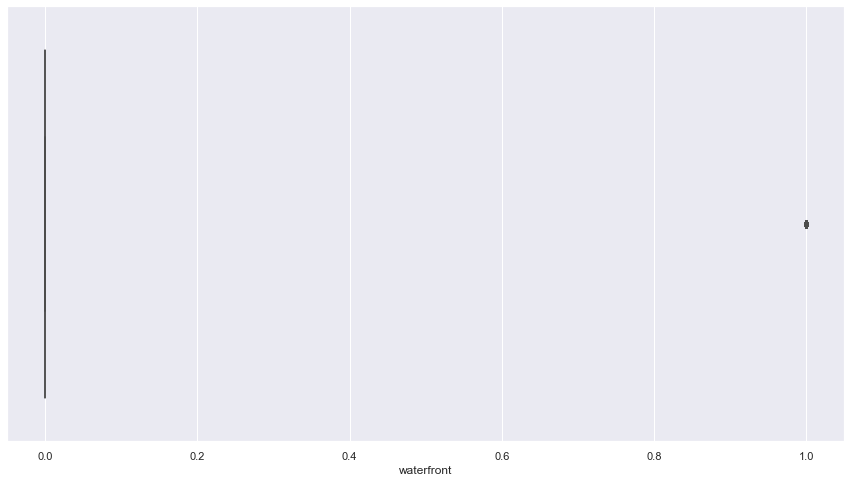

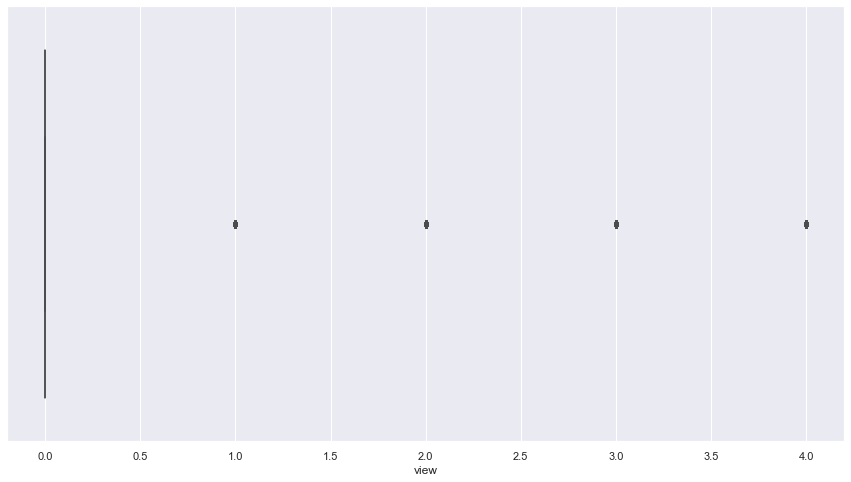

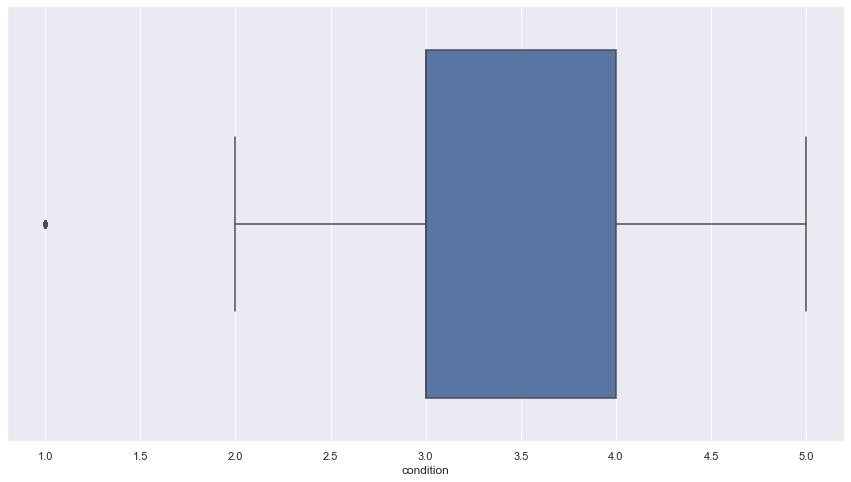

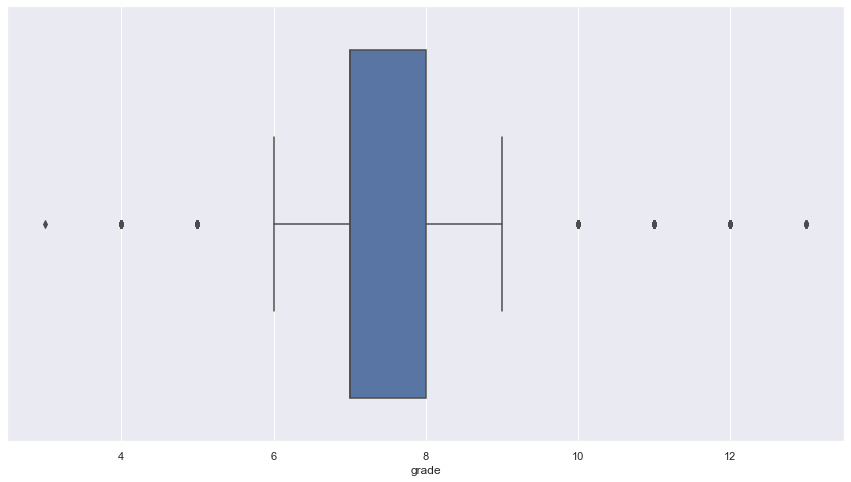

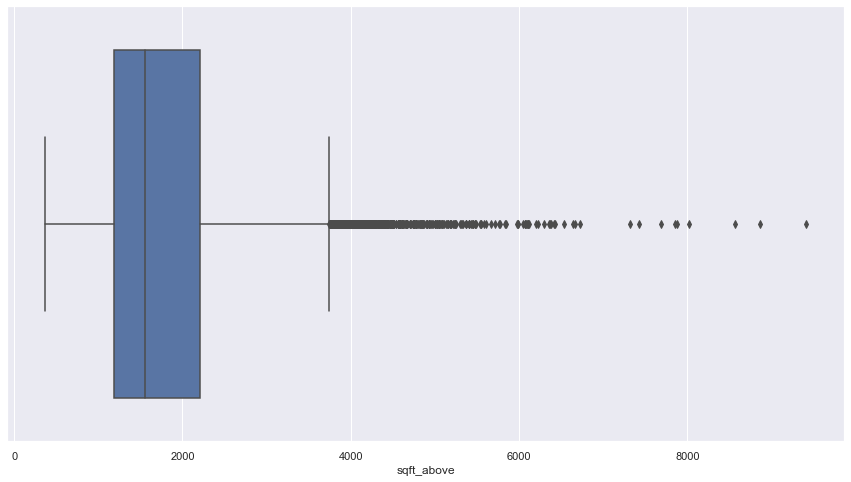

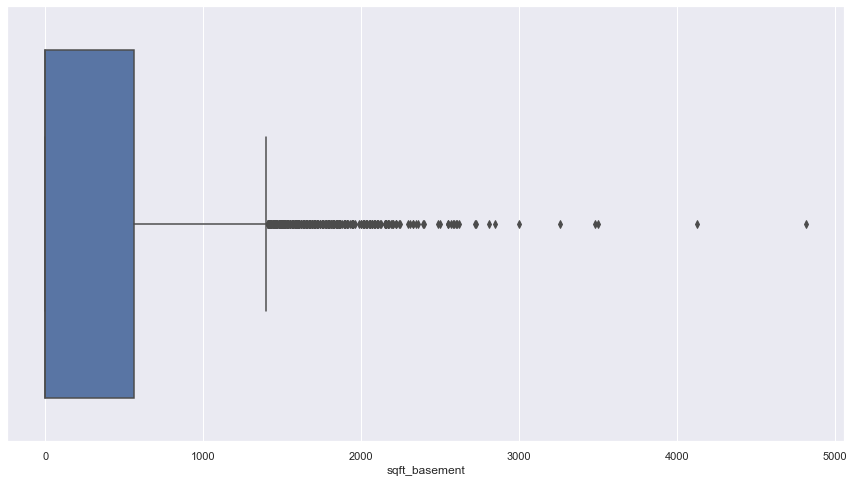

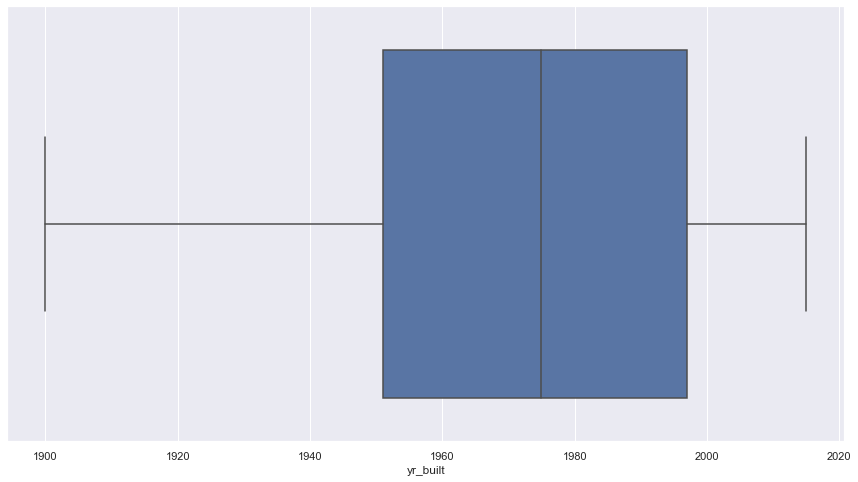

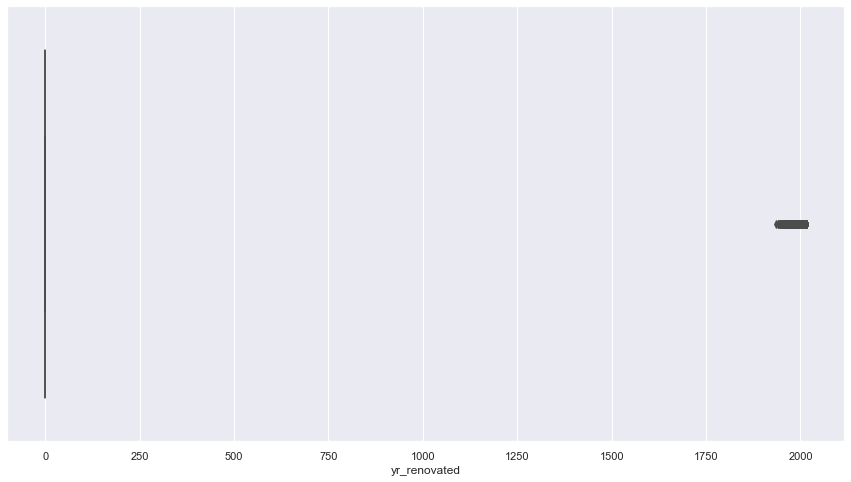

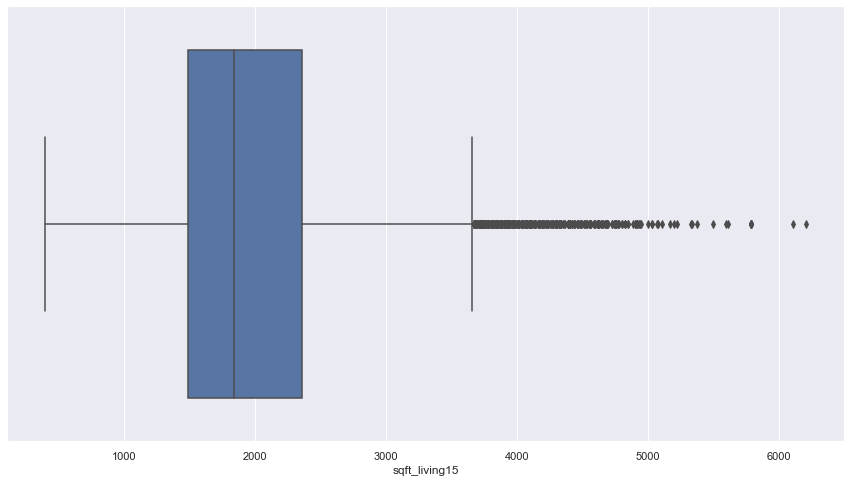

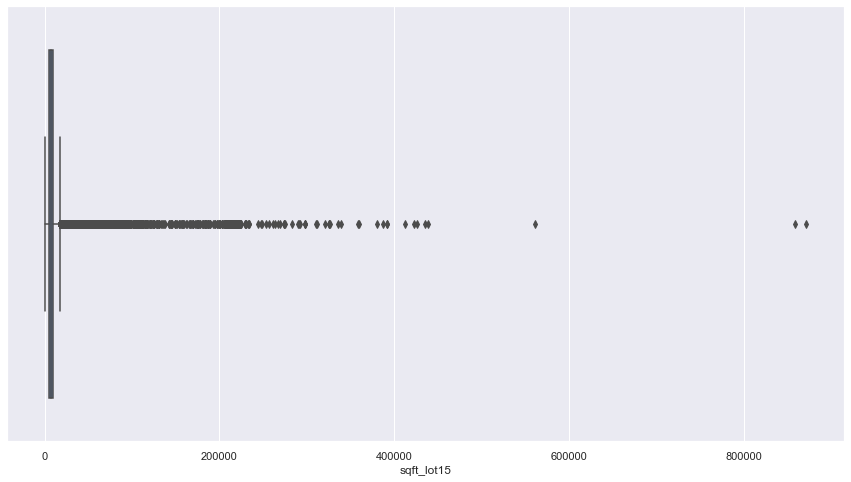

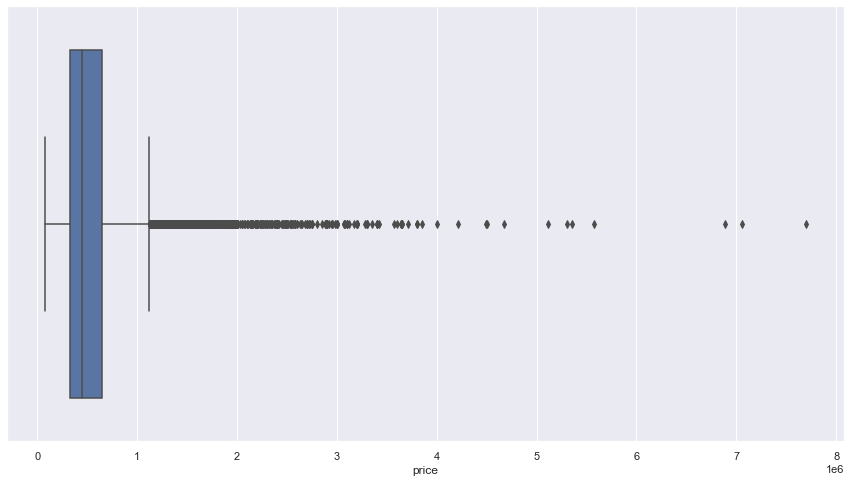

In [68]:
# Let's check in detail the outliers in the numerical variables with boxplots, so
for col in df_num:
    sns.boxplot(df_num[col])
    plt.show()

In [69]:
# We can notice a lot of outliers, especially in some columns like bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement  
# sqft_living15, sqft_lot15 and price. One solution is scaling, let's try different ways of scaling  

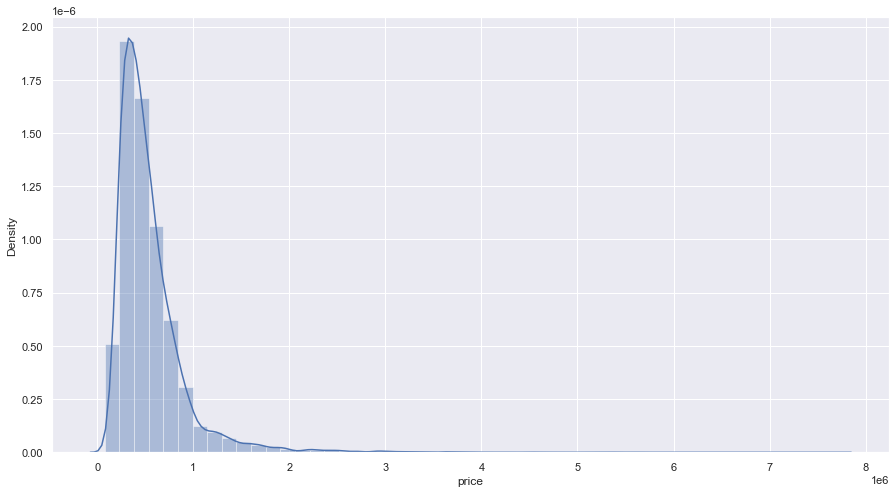

In [70]:
# Distribution plot of the target variable in order to identify outliers in the target variable
sns.distplot(df['price']);


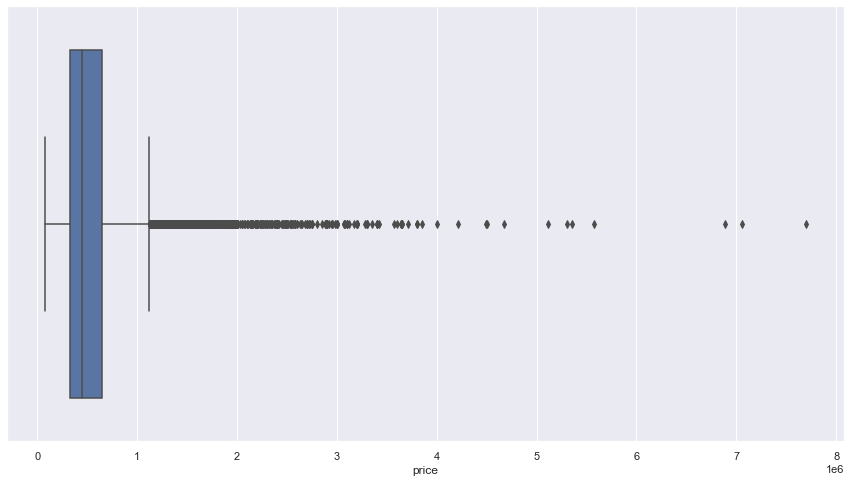

In [71]:
# boxplot of the target variable
sns.boxplot(df['price'])
plt.show()
# we have a lot of outliers at high prices

### Our second model will analyze the houses,that have a price greater than $650K

In [72]:
# let's filter the outliers by price. We are specially interested in predicting house prices above $650K
df_goal=df[df['price'] > 650000]
df_goal.shape

(5205, 17)

In [73]:
# getting the numerical part of the new dataframe
df_goal_num=df_goal.select_dtypes(include='number')


In [74]:
mask_goal = np.zeros_like(df_goal_num.corr())
mask_goal[np.triu_indices_from(mask_goal)] = True 
mask_goal

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

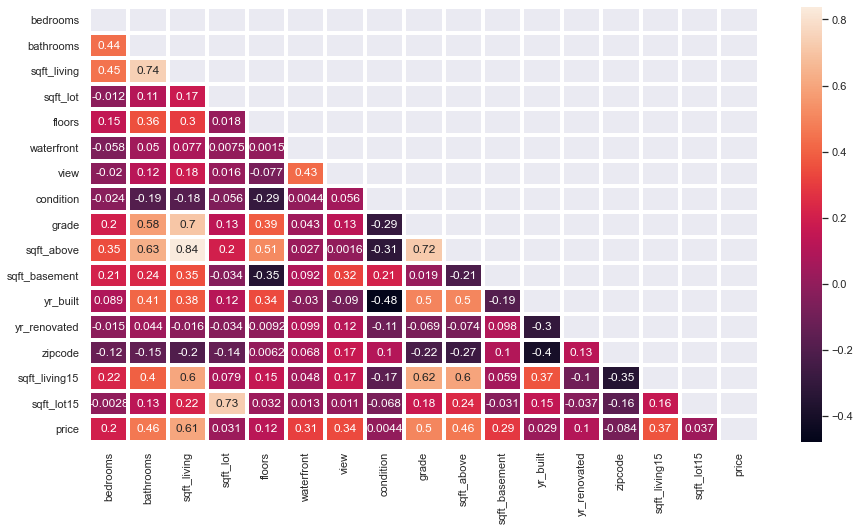

In [75]:
# getting the correlations matrix of the numerical features from the new dataframe
correlations_matrix_goal = df_goal_num.corr()
sns.heatmap(correlations_matrix_goal,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask_goal, annot=True)
plt.show()

In [76]:
# sorting the values of the previous correlations matrix
df_goal_num.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.606057
grade            0.504423
bathrooms        0.463602
sqft_above       0.463314
sqft_living15    0.369282
view             0.339186
waterfront       0.312399
sqft_basement    0.290405
bedrooms         0.202697
floors           0.122909
yr_renovated     0.104388
sqft_lot15       0.037170
sqft_lot         0.031003
yr_built         0.028809
condition        0.004363
zipcode         -0.083540
Name: price, dtype: float64

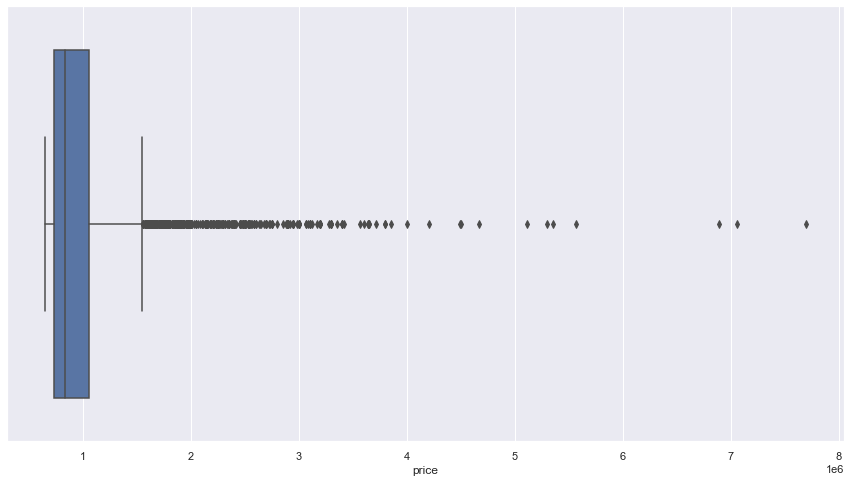

In [77]:
# checking with boxplot for the outliers of the outliers 
sns.boxplot(df_goal_num['price'])
plt.show()

### Now we will use just the houses that are cheaper than  $2M in order to filter the outliers

In [78]:
df_outliers=df_goal[df_goal['price'] < 2000000]
df_outliers.shape

(4997, 17)

In [79]:
# getting the numerical part
df_outliers_num=df_outliers.select_dtypes(include='number')

In [80]:
mask_out = np.zeros_like(df_outliers_num.corr())
mask_out[np.triu_indices_from(mask_out)] = True 
mask_out

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

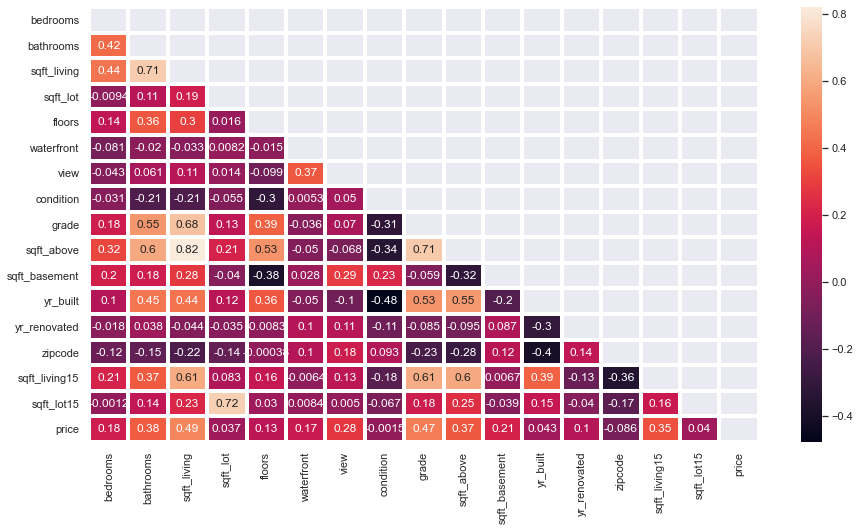

In [81]:
# getting the correlations matrix
correlations_matrix_outliers = df_outliers_num.corr()
sns.heatmap(correlations_matrix_outliers,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask_out, annot=True)
plt.show()

In [82]:
# sorting the values of the correlations matrix by the target-price
df_outliers_num.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.494340
grade            0.467389
bathrooms        0.376433
sqft_above       0.365327
sqft_living15    0.346418
view             0.278378
sqft_basement    0.207498
bedrooms         0.177789
waterfront       0.165931
floors           0.125958
yr_renovated     0.100184
yr_built         0.043430
sqft_lot15       0.039521
sqft_lot         0.036875
condition       -0.001531
zipcode         -0.085577
Name: price, dtype: float64

In [83]:
# X-y split
y_out = df_outliers['price']
X_out = df_outliers.drop('price', axis=1)

In [84]:
# train-test_split

X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

In [85]:
# from the numerical data we get the subset of the trained data
X_train_out_num = X_train_out.select_dtypes(include='number')
X_train_out_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
2919200440,4,2.5,1860,3840,1.5,0,0,3,7,1170,690,1928,2014,98117,1400,3840
824059324,4,3.5,3720,8301,2.0,0,0,3,10,2880,840,2008,0,98004,2080,9676


In [86]:
# we drop the column zipcode as it is a categorical feature
X_train_out_num = X_train_out_num.drop('zipcode', axis=1)
X_train_out_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
2919200440,4,2.5,1860,3840,1.5,0,0,3,7,1170,690,1928,2014,1400,3840
824059324,4,3.5,3720,8301,2.0,0,0,3,10,2880,840,2008,0,2080,9676


In [87]:
# from the categorical data we get the subset of the trained data
X_train_out_cat = X_train_out[['zipcode']]
X_train_out_cat.head(2)

,zipcode
id,
2919200440,98117
824059324,98004


In [88]:
# from the numerical data we get the subset of the test data
X_test_out_num = X_test_out.select_dtypes(include='number')
X_test_out_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
8651600160,4,2.25,2510,11585,2.0,0,0,4,8,2510,0,1969,0,98040,2450,9691
1564000410,4,2.50,3440,6332,2.0,0,0,3,10,3440,0,2001,0,98059,3310,6528


In [89]:
# The same as for the training set
X_test_out_num = X_test_out_num.drop('zipcode', axis=1)
X_test_out_num.head(2)



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
8651600160,4,2.25,2510,11585,2.0,0,0,4,8,2510,0,1969,0,2450,9691
1564000410,4,2.50,3440,6332,2.0,0,0,3,10,3440,0,2001,0,3310,6528


In [90]:
X_test_out_cat = X_test_out[['zipcode']]
X_test_out_cat.head(2)

,zipcode
id,
8651600160,98040
1564000410,98059


In [91]:
# Let's use One Hot/Label Encoding for the categorical feature
encoder = OneHotEncoder(drop='first').fit(X_train_out_cat)
encoded_out_train = encoder.transform(X_train_out_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_out_cat.columns)
onehot_encoded_train_out = pd.DataFrame(encoded_out_train, columns=cols)
onehot_encoded_train_out.head(2)

,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
MinMaxtransformer = MinMaxScaler().fit(X_train_out_num)
x_train_out_norm = MinMaxtransformer.transform(X_train_out_num)
print(x_train_out_norm.shape)
x_train_out_norm = pd.DataFrame(x_train_out_norm,columns=X_train_out_num.columns)
x_train_out_norm.head(2)

(3997, 15)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.333333,0.291667,0.144131,0.002011,0.25,0.0,0.0,0.5,0.250,0.087537,0.211656,0.243478,0.999504,0.109533,0.003290
1,0.333333,0.458333,0.420505,0.004713,0.50,0.0,0.0,0.5,0.625,0.341246,0.257669,0.939130,0.000000,0.247465,0.009996


In [93]:
X_train_out_concat = pd.concat([x_train_out_norm, onehot_encoded_train_out], axis=1)
X_train_out_concat.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.333333,0.291667,0.144131,0.002011,0.25,0.0,0.00,0.50,0.250,0.087537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.458333,0.420505,0.004713,0.50,0.0,0.00,0.50,0.625,0.341246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.208333,0.148588,0.003695,0.00,0.0,0.75,0.75,0.375,0.194362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.444444,0.333333,0.315007,0.002665,0.50,0.0,0.00,0.50,0.500,0.360534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.222222,0.375000,0.160475,0.012392,0.50,1.0,0.75,0.75,0.500,0.176558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
x_test_out_norm = MinMaxtransformer.transform(X_test_out_num)
print(x_test_out_norm.shape)
x_test_out_norm = pd.DataFrame(x_test_out_norm,columns=X_test_out_num.columns)
x_test_out_norm.head(2)

(1000, 15)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.333333,0.250000,0.240713,0.006703,0.5,0.0,0.0,0.75,0.375,0.286350,0.0,0.600000,0.0,0.322515,0.010014
1,0.333333,0.291667,0.378900,0.003521,0.5,0.0,0.0,0.50,0.625,0.424332,0.0,0.878261,0.0,0.496957,0.006379


In [95]:
# encoding X_test_out_cat
encoded_out_test = encoder.transform(X_test_out_cat).toarray()
cols = encoder.get_feature_names(input_features=X_test_out_cat.columns)
onehot_encoded_test_out = pd.DataFrame(encoded_out_test, columns=cols)
onehot_encoded_test_out.head(2)

,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# concatenating DataFrames
X_test_out_concat = pd.concat([x_test_out_norm, onehot_encoded_test_out], axis=1)
X_test_out_concat.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.333333,0.250000,0.240713,0.006703,0.5,0.0,0.0,0.75,0.375,0.286350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.291667,0.378900,0.003521,0.5,0.0,0.0,0.50,0.625,0.424332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
model_train_out = LinearRegression()
model_train_out.fit(X_train_out_concat, y_train_out)

LinearRegression()

In [98]:
predictions_out = model_train_out.predict(X_test_out_concat)
r2_score(y_test_out, predictions_out)

0.6855373470162327

We might have lower r2 score because of less train observations, so the sample is not representative 

In [99]:
mean_squared_error(y_test_out, predictions_out, squared=False)
math.sqrt(mean_squared_error(y_test_out, predictions_out, squared=False))
mean_absolute_error(y_test_out, predictions_out)

117200.195

In [100]:
# all of them
print('r2 score is: ', r2_score(y_test_out, predictions_out),', RMSE is: ', math.sqrt(mean_squared_error(y_test_out, predictions_out, squared=False)), ', MAE is: ', mean_absolute_error(y_test_out, predictions_out),'and MSE is: ', mean_squared_error(y_test_out, predictions_out, squared=False))

r2 score is:  0.6855373470162327 , RMSE is:  397.25329338968805 , MAE is:  117200.195 and MSE is:  157810.17910895357


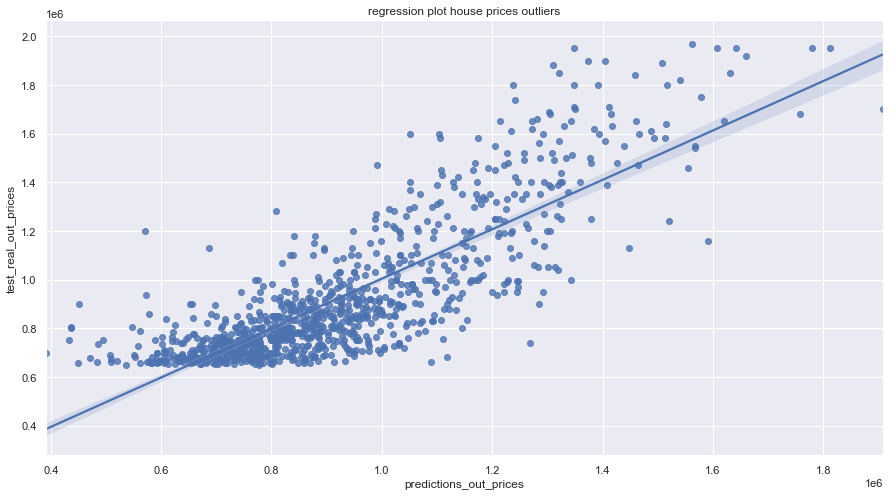

In [101]:
# regression plot between predictions_out and test_real_out_prices
sns.regplot(x=predictions_out, y=y_test_out)
plt.xlabel('predictions_out_prices')
plt.ylabel('test_real_out_prices')
plt.title('regression plot house prices outliers');

### The last model will be taking into account all the houses cheaper than $2M (we remove the outliers hence the most expensive houses)

In [108]:
# Now we will create a dataframe without the greatest outliers 
df_less_2M=df[df['price'] < 2000000]
df_less_2M.shape # we have now 208 obsvervations less, the outliers

(21389, 17)

In [109]:
df.shape

(21597, 17)

In [110]:
# getting the numerical part
df_less_2M_num=df_less_2M.select_dtypes(include='number')

In [111]:
# sorting the values of the correlations matrix by the target-price
df_less_2M_num.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.680880
sqft_living      0.679490
sqft_living15    0.601513
sqft_above       0.584374
bathrooms        0.508470
view             0.344275
bedrooms         0.316763
sqft_basement    0.285650
floors           0.278638
waterfront       0.142752
yr_renovated     0.118748
sqft_lot         0.098013
sqft_lot15       0.088028
yr_built         0.063376
condition        0.037310
zipcode         -0.046909
Name: price, dtype: float64

In [112]:
# We can compare with the values-correlations from the first dataframe
# price            1.000000
# sqft_living      0.701917
# grade            0.667951
# sqft_above       0.605368
# sqft_living15    0.585241
# bathrooms        0.525906
# view             0.397370
# sqft_basement    0.323799
# bedrooms         0.308787
# waterfront       0.266398
# floors           0.256804
# yr_renovated     0.126424
# sqft_lot         0.089876
# sqft_lot15       0.082845
# yr_built         0.053953
# condition        0.036056

In [113]:
# we can notice that the grade is more important in df_less_2M_num dataframe,
# also floors is more important in df_less_2M_num dataframe

In [114]:
# X-y split
y_2M = df_less_2M['price']
X_2M = df_less_2M.drop('price', axis=1)

In [115]:
# train-test_split
X_train_2M, X_test_2M, y_train_2M, y_test_2M = train_test_split(X_2M, y_2M, test_size=0.2, random_state=42)

In [116]:
# from the numerical data we get the subset of the trained data
X_train_2M_num = X_train_2M.select_dtypes(include='number')
X_train_2M_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
1324300380,3,1.0,1600,5000,1.5,0,0,3,7,1110,490,1947,0,98107,1380,5000
8078440050,4,2.5,2340,8248,2.0,0,0,3,8,2340,0,1989,0,98074,2140,9963


In [117]:
# we drop the column zipcode as we have already converted it to categorical
X_train_2M_num = X_train_2M_num.drop('zipcode', axis=1)
X_train_2M_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
1324300380,3,1.0,1600,5000,1.5,0,0,3,7,1110,490,1947,0,1380,5000
8078440050,4,2.5,2340,8248,2.0,0,0,3,8,2340,0,1989,0,2140,9963


In [118]:
# from the categorical data we get the subset of the trained data
X_train_2M_cat = X_train_2M[['zipcode']]
X_train_2M_cat.head(2)

,zipcode
id,
1324300380,98107
8078440050,98074


In [119]:
# from the numerical data we get the subset of the test data
X_test_2M_num = X_test_2M.select_dtypes(include='number')
X_test_2M_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
9407111220,2,1.00,1020,9200,1.0,0,0,3,7,1020,0,1978,0,98045,1520,9600
1336800185,3,2.75,2500,5568,2.0,0,0,5,9,2500,0,1905,0,98112,2810,5568


In [120]:
# we drop the column zipcode as we have already converted it to categorical
X_test_2M_num = X_test_2M_num.drop('zipcode', axis=1)
X_test_2M_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
9407111220,2,1.00,1020,9200,1.0,0,0,3,7,1020,0,1978,0,1520,9600
1336800185,3,2.75,2500,5568,2.0,0,0,5,9,2500,0,1905,0,2810,5568


In [121]:
# from the categorical data we get the subset of the test data
X_test_2M_cat = X_test_2M[['zipcode']]
X_test_2M_cat.head(2)

,zipcode
id,
9407111220,98045
1336800185,98112


In [122]:

encoder = OneHotEncoder(drop='first').fit(X_train_2M_cat)
encoded_2M_train = encoder.transform(X_train_2M_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_2M_cat.columns)
onehot_encoded_train_2M = pd.DataFrame(encoded_2M_train, columns=cols)
onehot_encoded_train_2M.head(2)

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
MinMaxtransformer = MinMaxScaler().fit(X_train_2M_num)
x_train_2M_norm = MinMaxtransformer.transform(X_train_2M_num)
print(x_train_2M_norm.shape)
x_train_2M_norm = pd.DataFrame(x_train_2M_norm,columns=X_train_2M_num.columns)
x_train_2M_norm.head(2)

(17111, 15)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.06250,0.071429,0.167120,0.002714,0.2,0.0,0.0,0.5,0.4,0.104965,0.17193,0.408696,0.0,0.172608,0.004996
1,0.09375,0.285714,0.267663,0.004681,0.4,0.0,0.0,0.5,0.5,0.279433,0.00000,0.773913,0.0,0.315197,0.010697


In [124]:
X_train_2M_concat = pd.concat([x_train_2M_norm, onehot_encoded_train_2M], axis=1)
X_train_2M_concat.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.06250,0.071429,0.167120,0.002714,0.2,0.0,0.0,0.5,0.4,0.104965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.09375,0.285714,0.267663,0.004681,0.4,0.0,0.0,0.5,0.5,0.279433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
x_test_2M_norm = MinMaxtransformer.transform(X_test_2M_num) # check "transform"
print(x_test_2M_norm.shape)
x_test_2M_norm = pd.DataFrame(x_test_2M_norm,columns=X_test_2M_num.columns)
x_test_2M_norm.head(2)

(4278, 15)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.03125,0.071429,0.088315,0.005258,0.0,0.0,0.0,0.5,0.4,0.092199,0.0,0.678261,0.0,0.198874,0.010280
1,0.06250,0.321429,0.289402,0.003058,0.4,0.0,0.0,1.0,0.6,0.302128,0.0,0.043478,0.0,0.440901,0.005648


In [126]:
encoded_2M_test = encoder.transform(X_test_2M_cat).toarray()
cols = encoder.get_feature_names(input_features=X_test_2M_cat.columns)
onehot_encoded_test_2M = pd.DataFrame(encoded_2M_test, columns=cols)
onehot_encoded_test_2M.head(2)

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
X_test_2M_concat = pd.concat([x_test_2M_norm, onehot_encoded_test_2M], axis=1)
X_test_2M_concat.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.03125,0.071429,0.088315,0.005258,0.0,0.0,0.0,0.5,0.4,0.092199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.06250,0.321429,0.289402,0.003058,0.4,0.0,0.0,1.0,0.6,0.302128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
model_train_2M = LinearRegression()
model_train_2M.fit(X_train_2M_concat, y_train_2M)

LinearRegression()

In [129]:
predictions_2M = model_train_2M.predict(X_test_2M_concat)
r2_score(y_test_2M, predictions_2M)
mean_squared_error(y_test_2M, predictions_2M, squared=False)
math.sqrt(mean_squared_error(y_test_2M, predictions_2M, squared=False))
mean_absolute_error(y_test_2M, predictions_2M)

81271.44480789847

In [238]:
# all of them
print('r2 score is: ', r2_score(y_test_2M, predictions_2M),', RMSE is: ', math.sqrt(mean_squared_error(y_test_2M, predictions_2M, squared=False)), ', MAE is: ', mean_absolute_error(y_test_2M, predictions_2M),'and MSE is: ', mean_squared_error(y_test_2M, predictions_2M, squared=False))

r2 score is:  0.8304071484887322 , RMSE is:  346.2591720598296 , MAE is:  81271.44480789847 and MSE is:  119895.41423555868


In [130]:
# this model seems to be more accurate and we also have a lot of observations 21597,
# it is better to drop the outliers of the outliers from the whole dataframe 
# and keep only observations < 2000000
# by dropping only 21597-21389=208 observations we have now much better r2 score and the sample is representative as well

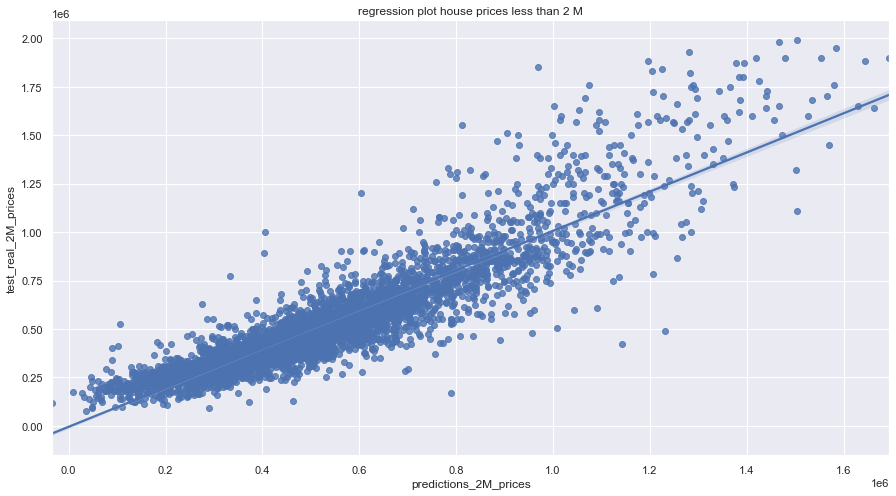

In [131]:
# regression plot between predictions_2M and test_real_2M_prices
sns.regplot(x=predictions_2M, y=y_test_2M)
plt.xlabel('predictions_2M_prices')
plt.ylabel('test_real_2M_prices')
plt.title('regression plot house prices less than 2 M');

In [240]:
# We can notice that this model best fits our data and every observation is closer to the line,
# so the metrics of the linear regression is much better when we drop the outliers of the outliers 